## Installations and Requirements

In [3]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     --------------------------------------- 0.0/38.1 MB 187.9 kB/s eta 0:03:23
     --------------------------------------- 0.0/38.1 MB 196.9 kB/s eta 0:03:14
     --------------------------------------- 0.1/38.1 MB 273.8 kB/s eta 0:02:19
     --------------------------------------- 0.1/38.1 MB 481.4 kB/s eta 0:01:19
     ---------------------------------------- 0.3/38.1 MB 1.1 MB/s eta 0:00:35
      --------------------------------------- 0.8/38.1 MB 2.2 MB/s eta 0:00:17
     -- ------------------------------------- 2.0/38.1 MB 5.1 MB/s eta 0:00:08
     --- ------------------------------------ 2.9/38.1 MB 6.8 MB/s eta 0:00:06
     ----- ---------------------------------- 4.8/38.1 MB 10.2 MB/s eta 0:00:04
     ------- -------------------------------- 6.7/38.1 MB 13.1 MB/s 


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\mherm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\mherm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\mherm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Imports

In [178]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import warnings
from PIL import Image

warnings.filterwarnings("ignore")

# Read Image

### Read image.jpg from the folder (using OpenCV)

In [179]:
image_bgr = cv2.imread(r"image.jpg")

### Convert it to RGB

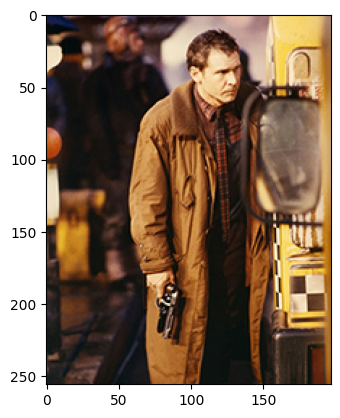

In [180]:
plt.imshow((image := cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)));

# Linear Point Operations

## Brightness

### Implement & Apply Brightness (from scratch without OpenCV)

In [181]:
def brightness(image, brightness_shift):
    if image.dtype == np.uint8:
        image_tmp = image.astype(np.float32)

    brightness_shift = np.clip(brightness_shift, 0, 9999)

    # Clip above if increasing, otherwise clip below
    adjusted_image = np.where(
            *((image_tmp * brightness_shift > 255, 255) if brightness_shift > 1 else (image_tmp * brightness_shift < 0, 0)),
            image_tmp * brightness_shift
        ).astype(np.uint8)
    
    return adjusted_image

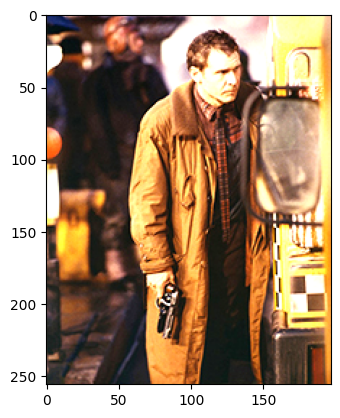

In [182]:
plt.imshow((image_brightness_adjusted_your := brightness(image, 1.5)));

### Implement & Apply Brightness (using OpenCV)

In [183]:
image_brightness_adjusted_opencv = cv2.convertScaleAbs(image, alpha=(brightness_factor := 1.5), beta=0)

### Plot & Compare Both Implementations

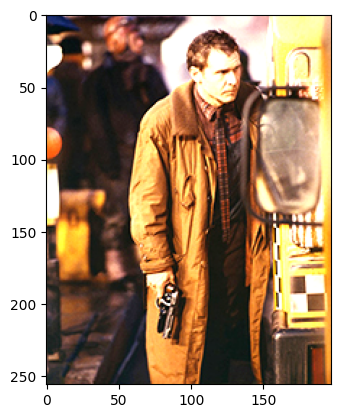

In [184]:
plt.imshow(image_brightness_adjusted_opencv)

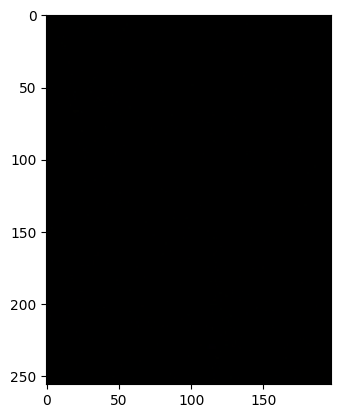

In [186]:
plt.imshow(image_brightness_adjusted_opencv - image_brightness_adjusted_your);

Almost no difference! wow

## Contrast

### Implement & Apply Contrast (from scratch without OpenCV)

In [187]:
def contrast(image, contrast_scale):
    if contrast_scale <= 0:
        raise ValueError("Contrast scale must be greater than 0.")

    image_mean = np.mean(image)
    adjusted_image = (image - image_mean) * contrast_scale + image_mean
    adjusted_image = np.clip(adjusted_image, 0, 255).astype(np.uint8)

    return adjusted_image

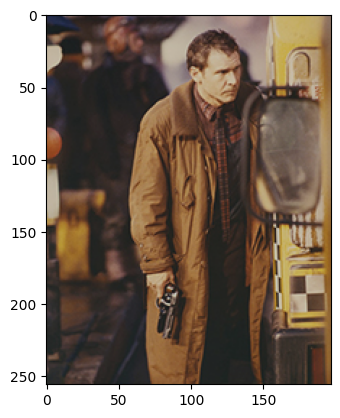

In [188]:
plt.imshow((image_contrast_adjusted_your := contrast(image, (contrast_scale := 0.7))));

### Implement & Apply Contrast (using OpenCV)

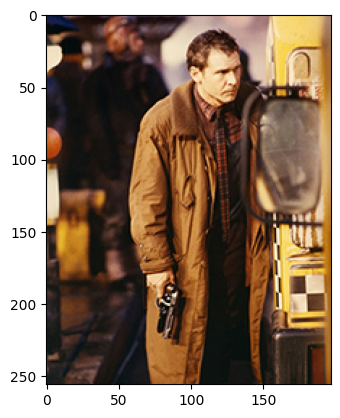

In [189]:
plt.imshow((image_contrast_adjusted_opencv := cv2.convertScaleAbs(image, alpha=1, beta=0.3)));

Eventhough the opencv example above was implemented in a manner which opencv docs suggest (alpha vs beta meanings are switched here to have a better match), the opencv library fails to provide us with a good contrast function

### Plot & Compare Both Implementations

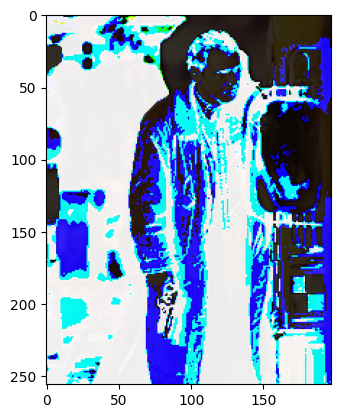

In [190]:
plt.imshow(image_contrast_adjusted_opencv - image_contrast_adjusted_your);

## Brightness & Contrast

### Implement Brightness & Contrast (from scratch without OpenCV)

In [191]:
def brightness_contrast(image: np.array, brightness_factor: float, contrast_factor: float):
    return brightness(contrast(image, contrast_factor), brightness_factor)

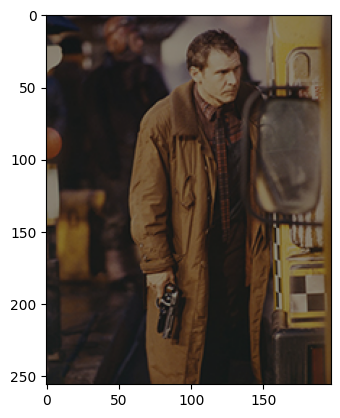

In [192]:
plt.imshow((image_adjusted_your := brightness_contrast(image, brightness_factor=0.7, contrast_factor=0.7)));

### Implement Brightness & Contrast (using OpenCV)

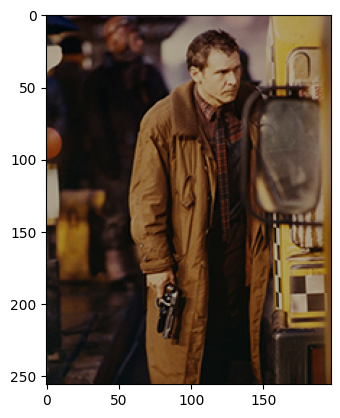

In [193]:
plt.imshow((image_adjusted_opencv := cv2.convertScaleAbs(image, alpha=0.7, beta=0.7)));

### Plot & Compare Both Implementations

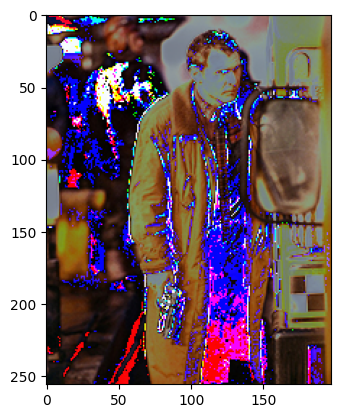

In [194]:
plt.imshow(image_brightness_adjusted_opencv - image_adjusted_your);

# Non Linear Point Operations

## Threshold

In [195]:
threshold_value = 128

### Convert Image To Grayscale (using OpenCV)

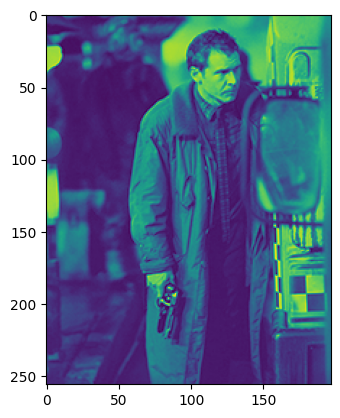

In [196]:
plt.imshow((gray_image := cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)));

### Implement & Apply Threshold (from scratch without OpenCV)

In [197]:
def threshold(image, threshold):
    return np.clip(image > threshold, threshold, image)

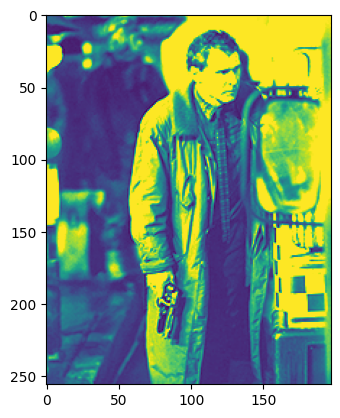

In [198]:
plt.imshow((image_threshold_your := threshold(gray_image, threshold_value)));

### Implement & Apply Threshold (using OpenCV)

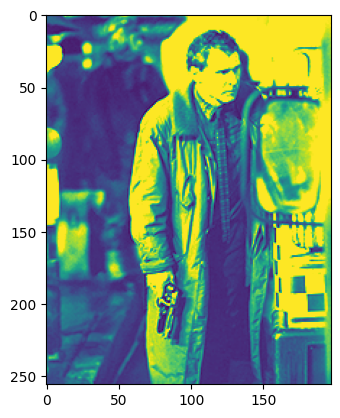

In [199]:
ret, image_threshold_opencv = cv2.threshold(gray_image, threshold_value, threshold_value, cv2.THRESH_TRUNC)
plt.imshow(image_threshold_opencv);

### Plot & Compare Both Implementations

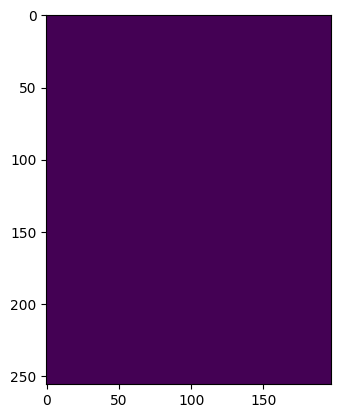

In [200]:
plt.imshow(image_threshold_opencv - image_threshold_your);

## Curves

### Implement sigmoidal contrast curve (S-shaped tone mapping) and apply it to the image (from scratch without OpenCV)

In [201]:
def contrast_curve(image: np.array, scale: float, location: float = 0):
    scale = 1/scale
    img_mean = np.mean(image)
    image_tmp = (image - img_mean)/128
    return (((image_tmp + location*image_tmp) / ((np.float_power(2, scale) - 1) + np.abs(image_tmp + location*image_tmp)))*128 + img_mean).astype(np.uint8)

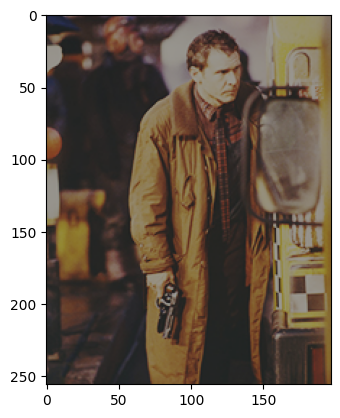

In [202]:
plt.imshow((image_contrast_adjusted_by_curve := contrast_curve(image, 1)));

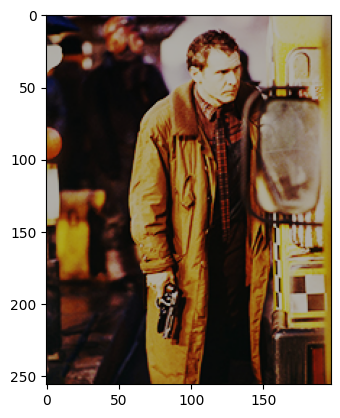

In [203]:
plt.imshow((image_contrast_adjusted_by_curve := contrast_curve(image, 2)));

## 1D LUT (Look Up Tables)

### Implement 1D LUT Apply Function Using Dict & List (from scratch without OpenCV)

In [204]:
def apply_1d_lut_dict(image: np.array, lut:dict) -> np.array:

    return np.array(
        [
            [
                [lut[image[i, j, k]] for k in range(image.shape[2])
                ] for j in range(image.shape[1])
            ] for i in range(image.shape[0])
        ])

In [205]:
def apply_1d_lut_list(image: np.array, lut:list) -> np.array:
    
    return np.array(
        [
            [
                [lut[image[i, j, k]] for k in range(image.shape[2])
                ] for j in range(image.shape[1])
            ] for i in range(image.shape[0])
        ])

### Create, Apply & Plot Image Inversion 1D LUT in Dict Representation

In [206]:
class lut_dict:
    def __getitem__(self, x):
        return 255-x

lut = lut_dict()

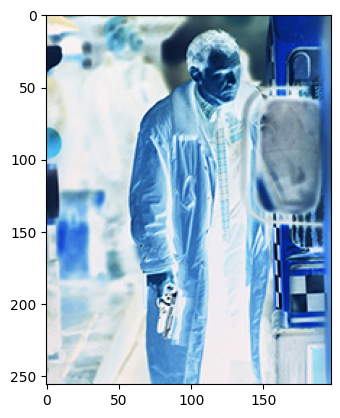

In [207]:
plt.imshow((image_inverted := apply_1d_lut_dict(image, lut)));

### Create, Apply & Plot Sigmoidal Contrast Curve 1D LUT in List Representation (from scratch without OpenCV)

In [208]:
location = 0
scale = 2
sigmolut = [int((((x-128)/128+location)/(np.power(2, 1/scale)-1+np.abs((x-128)/128+location)))*128 + 128) for x in range(256)]

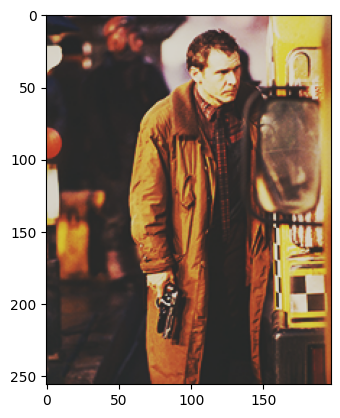

In [209]:
plt.imshow((image_contrast_adjusted_by_lut_your := apply_1d_lut_list(image, sigmolut)));

### Create, Apply & Plot Sigmoidal Contrast Curve 1D LUT in List Representation (using OpenCV)

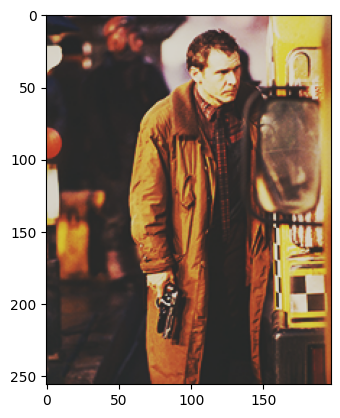

In [212]:
plt.imshow((image_contrast_adjusted_by_lut_opencv := cv2.LUT(image, np.array(sigmolut, dtype=np.uint8))));